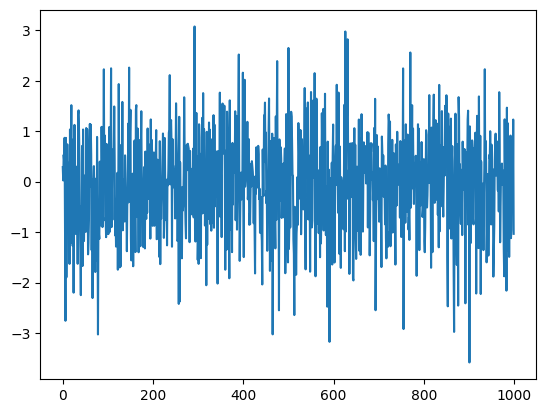

In [3]:
#show how relu adds non-linearity
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Generate a set of input values from -10 to 10
x = np.linspace(-10, 10, 100)
data=
plt.plot(data)

# # Apply the ReLU function to the input values
# y = relu(x)

# # Plot the ReLU function
# plt.plot(x, y)
# plt.xlabel('Input (x)')
# plt.ylabel('ReLU(x)')
# plt.title('ReLU Activation Function')
# plt.grid(True)
# plt.show()


In [33]:
# https://docs.google.com/document/d/1c-torSIEv5O3fu64BTgewv6Z4saxDVpoYngbntx3rWk/edit

# https://docs.google.com/presentation/d/1ucIENeip89OPriYbenWqT_39wM_q0yu7pQriYDEtqyE/edit?usp=sharing

# https://colab.research.google.com/drive/1rpPeFdr6BEOk06K_Nk02H2FtUrSSsoKN?usp=sharing

## Tuning Hyperparameters in Neural Network

In [34]:
# Tune the LR
import os
import numpy as np
import pandas as pd
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv")
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4875,white,7.4,0.22,0.26,1.2,0.035,18.0,97.0,0.99245,3.12,0.41,9.700000,6
1508,white,6.8,0.21,0.49,14.5,0.060,50.0,170.0,0.99910,3.55,0.44,9.800000,6
2528,white,6.4,0.16,0.37,1.5,0.037,27.0,109.0,0.99345,3.38,0.50,9.800000,6
4487,white,6.4,0.13,0.28,0.9,0.045,32.0,87.0,0.99175,3.47,0.52,11.200000,6
4410,white,5.7,0.24,0.47,6.3,0.069,35.0,182.0,0.99391,3.11,0.46,9.733333,5


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Prepare the data
df = df.dropna()
df['is_white_wine'] = [
    1 if type == 'white' else 0 for type in df['type']
]
df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop(['type', 'quality'], axis=1, inplace=True)

# Train/test split
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# How to optimize the learning rate in tensorflow
import tensorflow as tf
tf.random.set_seed(42)

In [37]:
#choose the boundaries of learning rate
1e-3 * 10 ** (1 / 30), 1e-3 * 10 ** (100 / 30)


(0.0010797751623277097, 2.1544346900318847)

In [39]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

initial_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

# callbacks are ways to inject stuff into the training
# in this case learning rate will keep changing by the scheduler
initial_history = initial_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/100
162/162 [==============================] - 2s 3ms/step - loss: 0.5258 - accuracy: 0.7371 - lr: 0.0010
Epoch 2/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7642 - lr: 0.0011
Epoch 3/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7712 - lr: 0.0012
Epoch 4/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4634 - accuracy: 0.7826 - lr: 0.0013
Epoch 5/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.7859 - lr: 0.0014
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.7863 - lr: 0.0015
Epoch 7/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.7936 - lr: 0.0016
Epoch 8/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4343 - accuracy: 0.7983 - lr: 0.0017
Epoch 9/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4283 - accu

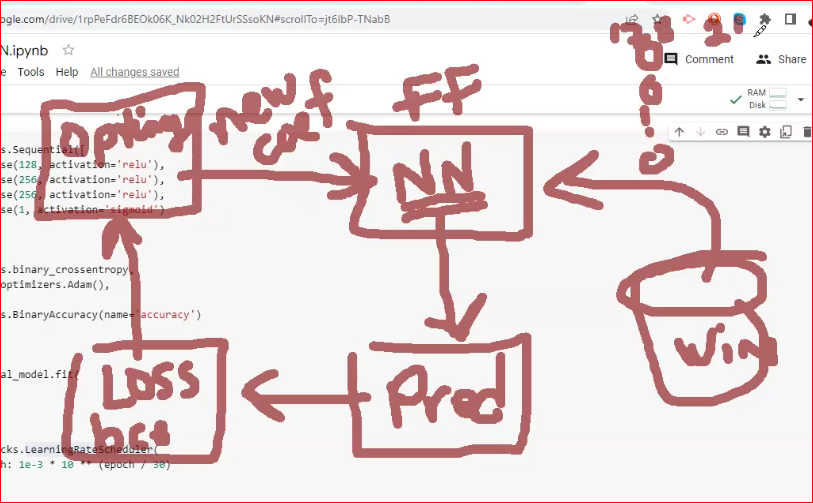

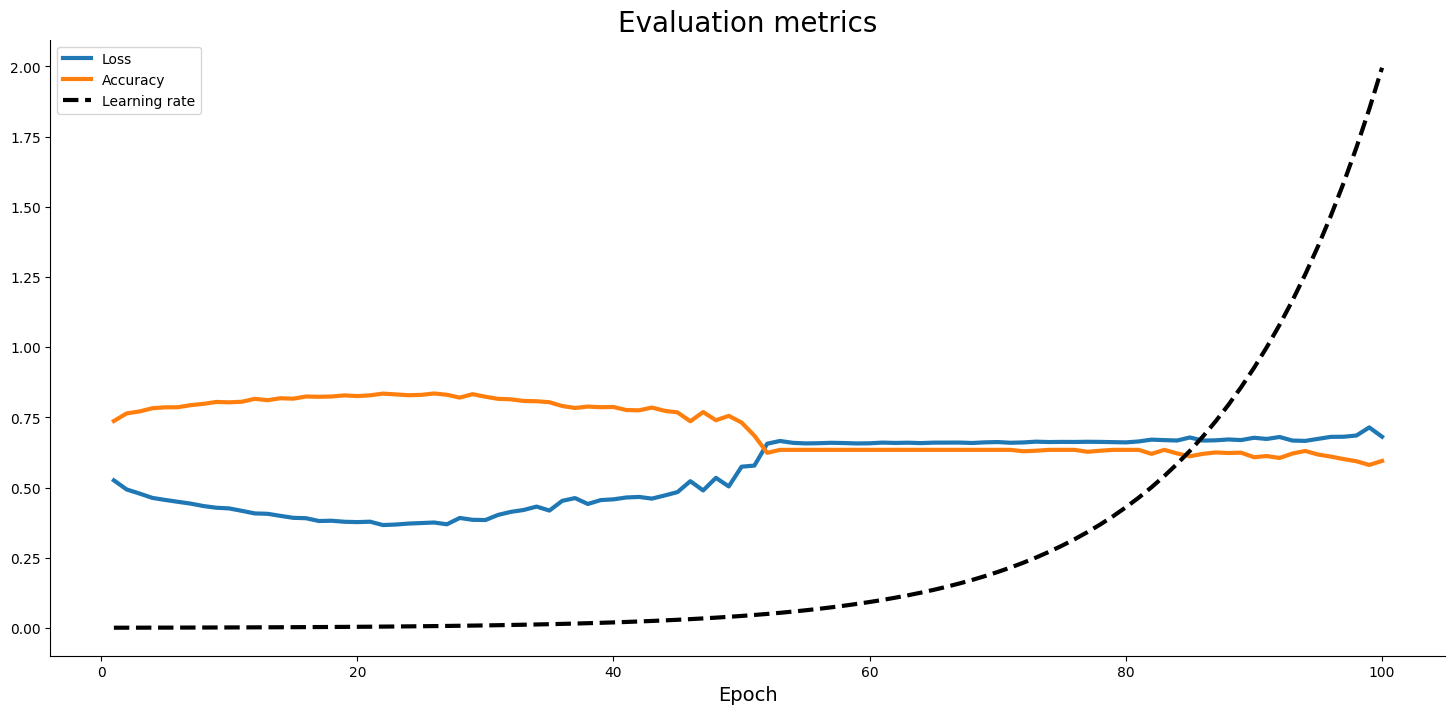

In [40]:
# visualize
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 101), 
    initial_history.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['lr'], 
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();
# run till epoch 50 ; more than is overfitting

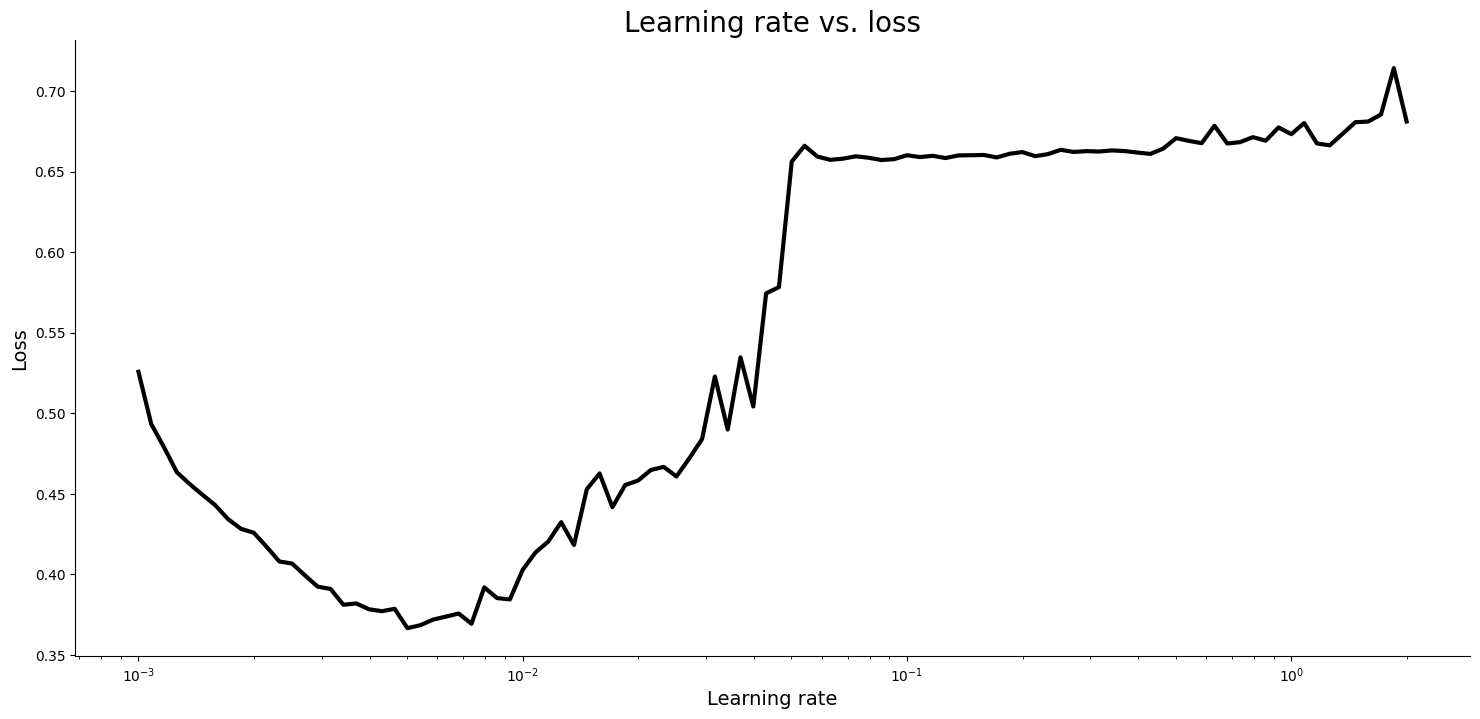

In [41]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates, 
    initial_history.history['loss'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);
# learning rate of log(10-2) is optimal

In [42]:
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    epochs=100
)

Epoch 1/100
162/162 [==============================] - 2s 3ms/step - loss: 0.5321 - accuracy: 0.7360
Epoch 2/100
162/162 [==============================] - 1s 4ms/step - loss: 0.5097 - accuracy: 0.7545
Epoch 3/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7602
Epoch 4/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7712
Epoch 5/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4820 - accuracy: 0.7723
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7768
Epoch 7/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4670 - accuracy: 0.7768
Epoch 8/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.7851
Epoch 9/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7812
Epoch 10/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4474 - accura

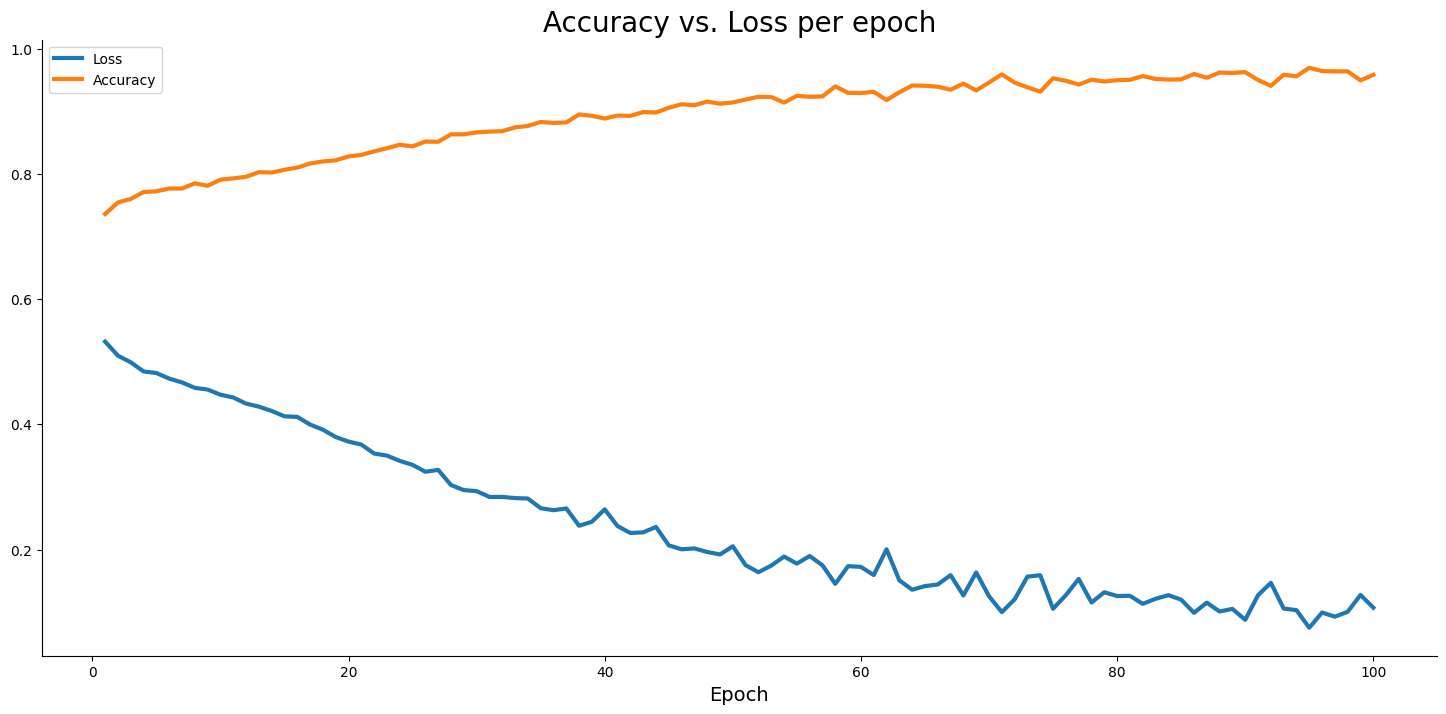

In [43]:
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [46]:
#optimizing Learning Rate increased the accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model_optimized.predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]


print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

41/41 [==============================] - 0s 3ms/step
Accuracy on the test set: 0.77

Confusion matrix:
[[332 150]
 [143 668]]


# Finding the optimal NN
How many neurons, how many layers, etc.

In [ ]:
# How to find the optimal architecture in tensorflow
# boils down to 100s of model to find the optimal model so look at quick wins

In [51]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import itertools
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tf.random.set_seed(42)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv")
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2204,white,7.6,0.27,0.33,2.0,0.059,19.0,175.0,0.99440,3.22,0.56,9.9,5
3045,white,5.7,0.12,0.26,5.5,0.034,21.0,99.0,0.99324,3.09,0.57,9.9,6
3947,white,6.1,0.30,0.32,2.2,0.042,41.0,142.0,0.98952,3.31,0.44,12.7,7
4638,white,6.5,0.51,0.25,1.7,0.048,39.0,177.0,0.99212,3.28,0.57,10.6,5
6417,red,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,5


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
df = df.dropna()
df['is_white_wine'] = [1 if typ == 'white' else 0 for typ in df['type']]
df['is_good_wine'] = [1 if quality >= 6 else 0 for quality in df['quality']]
df.drop(['type', 'quality'], axis=1, inplace=True)

# Train/test split
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
num_layers = 3
min_nodes_per_layer = 64
max_nodes_per_layer = 256
node_step_size = 64

In [54]:
node_options = list(range(
    min_nodes_per_layer, 
    max_nodes_per_layer + 1, 
    node_step_size
))
node_options

[64, 128, 192, 256]

In [57]:
#make a gridserach kind of matrix on which we will iterate for best architecture
two_layer_possibilities = [node_options, node_options]
list(itertools.product(*two_layer_possibilities))

[(64, 64),
 (64, 128),
 (64, 192),
 (64, 256),
 (128, 64),
 (128, 128),
 (128, 192),
 (128, 256),
 (192, 64),
 (192, 128),
 (192, 192),
 (192, 256),
 (256, 64),
 (256, 128),
 (256, 192),
 (256, 256)]

In [58]:
layer_possibilities = [node_options] * num_layers
layer_node_permutations = list(itertools.product(*layer_possibilities))
layer_node_permutations

[(64, 64, 64),
 (64, 64, 128),
 (64, 64, 192),
 (64, 64, 256),
 (64, 128, 64),
 (64, 128, 128),
 (64, 128, 192),
 (64, 128, 256),
 (64, 192, 64),
 (64, 192, 128),
 (64, 192, 192),
 (64, 192, 256),
 (64, 256, 64),
 (64, 256, 128),
 (64, 256, 192),
 (64, 256, 256),
 (128, 64, 64),
 (128, 64, 128),
 (128, 64, 192),
 (128, 64, 256),
 (128, 128, 64),
 (128, 128, 128),
 (128, 128, 192),
 (128, 128, 256),
 (128, 192, 64),
 (128, 192, 128),
 (128, 192, 192),
 (128, 192, 256),
 (128, 256, 64),
 (128, 256, 128),
 (128, 256, 192),
 (128, 256, 256),
 (192, 64, 64),
 (192, 64, 128),
 (192, 64, 192),
 (192, 64, 256),
 (192, 128, 64),
 (192, 128, 128),
 (192, 128, 192),
 (192, 128, 256),
 (192, 192, 64),
 (192, 192, 128),
 (192, 192, 192),
 (192, 192, 256),
 (192, 256, 64),
 (192, 256, 128),
 (192, 256, 192),
 (192, 256, 256),
 (256, 64, 64),
 (256, 64, 128),
 (256, 64, 192),
 (256, 64, 256),
 (256, 128, 64),
 (256, 128, 128),
 (256, 128, 192),
 (256, 128, 256),
 (256, 192, 64),
 (256, 192, 128),
 (2

In [64]:
for permutation in layer_node_permutations[:2]:
    for nodes_at_layer in permutation:
        print(nodes_at_layer)
    print()

64
64
64

64
64
128



In [65]:
models = []

for permutation in layer_node_permutations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(12,)))
    model_name = ''
    
    for nodes_at_layer in permutation:
        model.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
        model_name += f'dense{nodes_at_layer}_'
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model._name = model_name[:-1]
    
    models.append(model)

In [66]:
models[0].summary()

Model: "dense64_dense64_dense64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_780 (Dense)           (None, 64)                832       
                                                                 
 dense_781 (Dense)           (None, 64)                4160      
                                                                 
 dense_782 (Dense)           (None, 64)                4160      
                                                                 
 dense_783 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [67]:
# create a  function - this is all we need
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    
    models = []
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''

        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += f'dense{nodes_at_layer}_'

        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = model_name[:-1]
        models.append(model)
        
    return models

In [69]:
all_models = get_models(
    num_layers=3, 
    min_nodes_per_layer=64, 
    max_nodes_per_layer=256, 
    node_step_size=64, 
    input_shape=(12,)
)

In [ ]:
all_models

In [73]:
def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 50,
             verbose: int = 0) -> pd.DataFrame:
    
    # We'll store the results here
    results = []
    
    def train(model: tf.keras.Sequential) -> dict:
        # Change this however you want 
        # We're not optimizing this part today
        model.compile(
            loss=tf.keras.losses.binary_crossentropy,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy')
            ]
        )
        
        # Train the model
        model.fit(
            X_train,
            y_train,
            epochs=epochs,
            verbose=verbose
        )
        
        # Make predictions on the test set
        preds = model.predict(X_test)
        prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]
        
        # Return evaluation metrics on the test set
        return {
            'model_name': model.name,
            'test_accuracy': accuracy_score(y_test, prediction_classes),
            'test_precision': precision_score(y_test, prediction_classes),
            'test_recall': recall_score(y_test, prediction_classes),
            'test_f1': f1_score(y_test, prediction_classes)
        }
    
    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
        
    return pd.DataFrame(results)

In [74]:
optimization_results = optimize(
    models=all_models,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test
)
optimization_results.sort_values(by='test_accuracy', ascending=False)

41/41 [==============================] - 0s 1ms/step


,model_name,test_accuracy,test_precision,test_recall,test_f1
45,dense192_dense256_dense128,0.806651,0.854614,0.833539,0.843945
59,dense256_dense192_dense256,0.805878,0.837349,0.856967,0.847044
14,dense64_dense256_dense192,0.805878,0.836538,0.858200,0.847231
25,dense128_dense192_dense128,0.804331,0.842752,0.845869,0.844308
4,dense64_dense128_dense64,0.804331,0.835337,0.856967,0.846013
...,...,...,...,...,...
21,dense128_dense128_dense128,0.779582,0.823096,0.826141,0.824615
55,dense256_dense128_dense256,0.778036,0.814904,0.836005,0.825320
35,dense192_dense64_dense256,0.778036,0.829975,0.812577,0.821184
31,dense128_dense256_dense256,0.776489,0.837209,0.799014,0.817666
